<a href="https://colab.research.google.com/github/OhJin-Soo/code_practice/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Sample image : china.jpg')

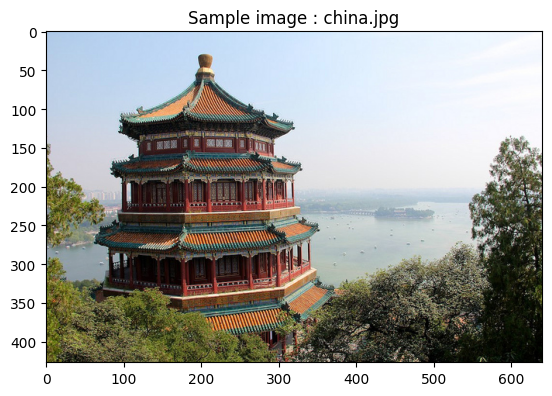

In [1]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import cv2

china = load_sample_image('china.jpg')
plt.imshow(china)
plt.title('Sample image : china.jpg')

In [2]:
print('china.shape =', china.shape)
print('china.dytpe =', china.dtype)

china.shape = (427, 640, 3)
china.dytpe = uint8


Text(0.5, 1.0, '9X9 Blur filter')

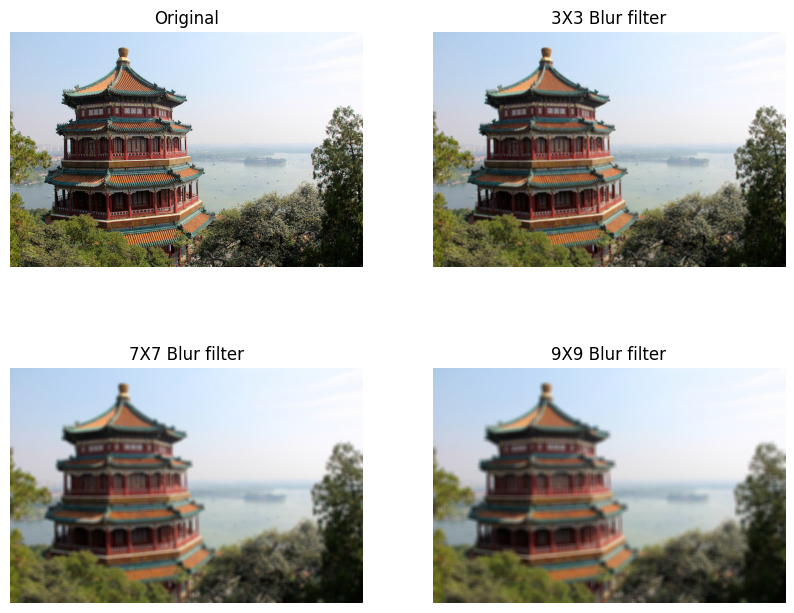

In [3]:
def blur_filter(img, n):
  filter = np.ones((n,n), np.float32) / (n*n)
  blurred = cv2.filter2D(img, -1, filter)
  return blurred

china = load_sample_image('china.jpg')
fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].imshow(china)
ax[0,0].axis('off')
ax[0,0].set_title('Original')

ax[0,1].imshow(blur_filter(china,3))
ax[0,1].axis('off')
ax[0,1].set_title('3X3 Blur filter')

ax[1,0].imshow(blur_filter(china,7))
ax[1,0].axis('off')
ax[1,0].set_title('7X7 Blur filter')

ax[1,1].imshow(blur_filter(china,9))
ax[1,1].axis('off')
ax[1,1].set_title('9X9 Blur filter')

Text(0.5, 1.0, 'Edge X')

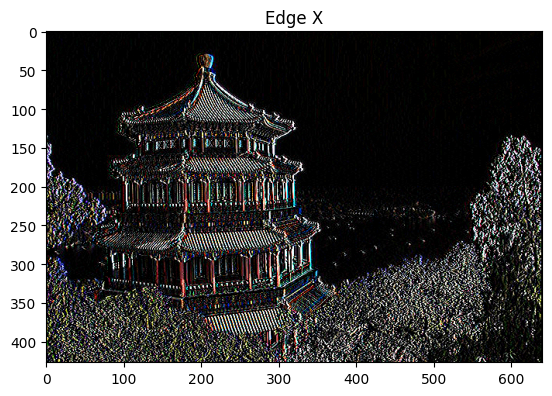

In [4]:
china = load_sample_image('china.jpg')
v_filter = np.array([[-4,0,4]])

v_filtered = cv2.filter2D(china, -1, v_filter)
plt.imshow(v_filtered)
plt.title('Edge X')

Text(0.5, 1.0, 'Edge X')

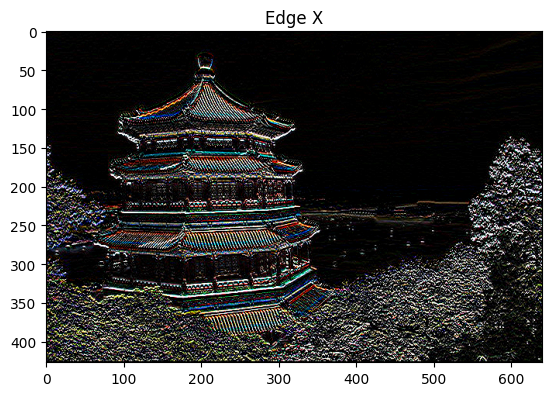

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
china = load_sample_image('china.jpg')
h_filter = np.array([[-4],
                     [0],
                     [4]])

h_filtered = cv2.filter2D(china, -1, h_filter)
plt.imshow(h_filtered)
plt.title('Edge X')

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
train_images = train_images[:,:,:,np.newaxis]
test_images = test_images[:,:,:,np.newaxis]
train_images, test_images = train_images / 255, test_images / 255

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape = (28,28,1),
                       kernel_size = (3,3), padding = 'same',
                       filters = 32),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same',
                        filters = 64),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same',
                        filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),

])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         200,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,570 (947.54 KB)

 Trainable params: 242,570 (947.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
hist = model.fit(train_images, train_labels,
                 epochs=5, validation_split = 0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7685 - loss: 0.6415 - val_accuracy: 0.8773 - val_loss: 0.3349
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8855 - loss: 0.3109 - val_accuracy: 0.8831 - val_loss: 0.3089
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9087 - loss: 0.2493 - val_accuracy: 0.8954 - val_loss: 0.2861
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9176 - loss: 0.2167 - val_accuracy: 0.9074 - val_loss: 0.2675
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9301 - loss: 0.1880 - val_accuracy: 0.9037 - val_loss: 0.2697


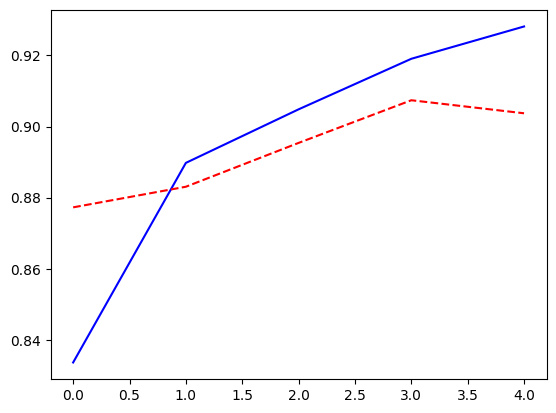

In [11]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels,
                                     verbose=2)
print("테스트 정확도:",test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.9011 - loss: 0.2873
테스트 정확도: 0.9010999798774719


In [21]:
mnist_lbl = ['T-shirt','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle_boot']
images = test_images
pred = np.argmax(model.predict(images), axis=1)
print("예측값 =", pred)
print("실제값 =", test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
예측값 = [9 2 1 ... 8 1 5]
실제값 = [9 2 1 ... 8 1 5]


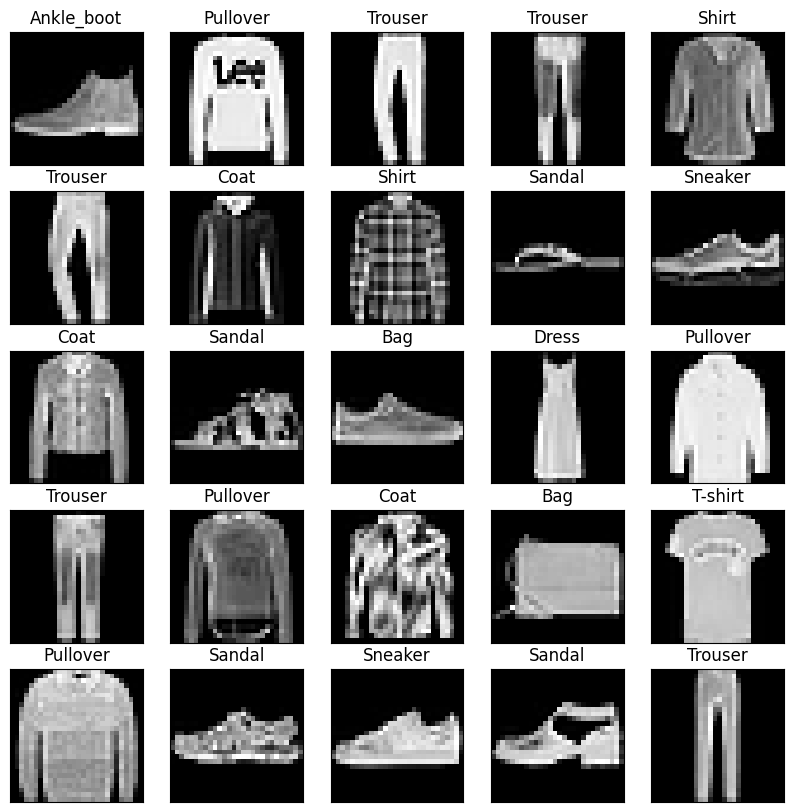

In [17]:
def plot_images(images, labels,images_per_row = 5):
  n_images = len(images)
  n_rows = (n_images-1) // images_per_row + 1
  fig, ax = plt.subplots(n_rows, images_per_row,
                         figsize = (images_per_row * 2, n_rows * 2))

  for i in range(n_rows):
    for j in range(images_per_row):
      if i*images_per_row + j >= n_images: break
      img_idx = i*images_per_row + j
      a_image = images[img_idx].reshape(28,28)
      if n_rows>1: axis = ax[i,j]
      else: axis = ax[j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      label = mnist_lbl[labels[img_idx]]
      axis.set_title(label)
      axis.imshow(a_image, cmap='gray', interpolation= 'nearest')

plot_images(images, pred, images_per_row = 5)

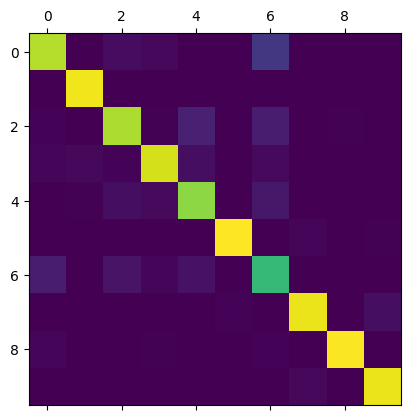

In [23]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(pred, test_labels)
plt.matshow(conf_mat)

In [24]:
print(conf_mat)

[[879   2  32  20   1   0 161   0   3   0]
 [  0 967   0   2   0   0   0   0   1   0]
 [  8   2 868   7  91   0  76   0   4   0]
 [ 18  23   9 924  37   0  24   0   2   0]
 [  3   4  37  27 821   0  64   0   1   0]
 [  3   0   0   0   0 988   0  17   3   4]
 [ 77   1  52  14  47   0 663   0   0   0]
 [  0   0   0   0   0   8   0 959   3  36]
 [ 12   1   2   6   3   1  11   1 983   1]
 [  0   0   0   0   0   3   1  23   0 959]]


In [27]:
model.fit(train_images, train_labels,
          epochs=10, validation_split=0.25)

ValueError: You must call `compile()` before using the model.

In [28]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape = (28,28,1),
                       kernel_size = (3,3), padding = 'same',
                       filters = 32),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Dropout(.2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same',
                        filters = 64),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same',
                        filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


소감 : 예전에 부캠에서 배웠던 내용인데, 그때는 후반부라 열심히 안했던 부분.. 이번에 다시 제대로 공부해봤다. 풀링,패딩,합성곱 등등 핵심은 핵심 정보만 남기면서 어떻게 전체 데이터 크기를 유지할 수 있을까? 이다. 이미지 말고도 다른 분야에서도 사용된다고 한다. GNN, NLP, 시계열 데이터에서도 사용된다고 한다. 용도는 마찬가지로 핵심 정보는 남기면서, 전체 크기를 최대한 유지하는 방식.